<a href="https://colab.research.google.com/github/kdemertzis/EKPA/blob/main/Phishing_URLs_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Υλοποίηση ευφυούς συστήματος εντοπισμού περιεχομένου που προέρχεται από το σκοτεινό διαδίκτυο με μεθόδους Μηχανικής Μάθησης**

*Συστήματα Τεχνητής Νοημοσύνης στην Κυβερνοασφάλεια*

## **Στόχος:**

Ο όρος σκοτεινό διαδίκτυο (darknet ή darkweb) αναφέρεται σε ένα ιδιωτικό και συχνά κρυφό δίκτυο όπου οι συνδέσεις γίνονται μόνο μεταξύ αξιόπιστων ομοτίμων χρησιμοποιώντας μη τυπικά πρωτόκολλα και θύρες, δεν αποτελεί μέρος του γνωστού διαδικτύου, δεν ευρετηριάζεται από τις μηχανές αναζήτησης και δεν είναι προσβάσιμο στο ευρύ κοινό με συμβατικά μέσα πλοήγησης. Ένας από τους πιο γνωστούς τρόπους πρόσβασης στο σκοτεινό διαδίκτυο είναι μέσω του δικτύου Tor (the onion router) το οποίο επιτρέπει στους χρήστες να έχουν πρόσβαση ανώνυμα κρυπτογραφώντας και δρομολογώντας την κυκλοφορία τους μέσω μιας σειράς διακομιστών που λειτουργούν από εθελοντές. Ενώ το Tor είναι ένα εργαλείο σχεδιασμένο για προστασία της ιδιωτικής ζωής και εφαρμογής ανωνυμίας σε υψηλό βαθμό, έχει συσχετιστεί με παράνομες δραστηριότητες και εγκληματικές ενέργειες λόγω της ανωνυμίας που παρέχει. Υπό αυτό το πνεύμα, οποιαδήποτε επικοινωνία από το σκοτεινό διαδίκτυο θα πρέπει να αντιμετωπίζεται με σκεπτικισμό, καθώς όποια επισκεψιμότητα δεν έχει σχεδιαστεί, θα πρέπει να θεωρείται μη επιδιωκόμενη και να αντιμετωπίζεται ως μέθοδος πιθανής εισβολής.
**Ο στόχος** αυτής της υλοποίησης είναι να εκπαιδεύσει μοντέλα ΜΜ σε ένα κατάλληλο σύνολο δεδομένων που δημιουργήθηκε για την ταξινόμηση της κυκλοφορίας που προέρχεται από το σκοτεινό διαδίκτυο.

*Google Collaboratory*<br>
*Παράδειγμα χρήσης μεθόδων ΜΜ στην επίλυση ενός προβλήματος κυβερνοασφάλειας*

## **Εισαγωγή Βιβλιοθηκών - Πακέτων:**

Γίνεται εισαγωγή των κατάλληλων βιβλιοθηκών - πακέτων της Python για την εκτέλεση της εφαρμογής.

In [1]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

## **Σύνολο Δεδομένων:**

Το σύνολο δεδομένων υπάρχει ως αρχείο csv στην θέση [/EKPA/Data/DarkNet.csv](https://github.com/kdemertzis/EKPA/blob/main/Data/DarkNet.csv) και περιλαμβάνει 68580 καταγραφές δικτυακών επικοινωνιών.

In [2]:
#εισαγωγή του συνόλου δεδομένων
dataset = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/DarkNet.csv', low_memory=False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dataset.head()


,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes/s,Flow_Packets/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets/s,Bwd_Packets/s,Packet_Length_Min,Packet_Length_Max,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down/Up_Ratio,Average_Packet_Size,Fwd_Segment_Size_Avg,Bwd_Segment_Size_Avg,Fwd_Bytes/Bulk_Avg,Fwd_Packet/Bulk_Avg,Fwd_Bulk_Rate_Avg,Bwd_Bytes/Bulk_Avg,Bwd_Packet/Bulk_Avg,Bwd_Bulk_Rate_Avg,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,FWD_Init_Win_Bytes,Bwd_Init_Win_Bytes,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label-1,Label-2
0,10.152.152.11,57158,216.58.220.99,443,6,229,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0,8733.624454,229.00000,0.00000,229,229,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,4366.812227,4366.812227,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1892,1047,0,20,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
1,10.152.152.11,57159,216.58.220.99,443,6,407,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0,4914.004914,407.00000,0.00000,407,407,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2457.002457,2457.002457,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1987,1047,0,20,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
2,10.152.152.11,57160,216.58.220.99,443,6,431,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0,4640.371230,431.00000,0.00000,431,431,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2320.185615,2320.185615,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2049,1047,0,20,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
3,10.152.152.11,49134,74.125.136.120,443,6,359,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0,5571.030641,359.00000,0.00000,359,359,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2785.515320,2785.515320,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2008,1047,0,20,0,0,0,0,0,0.000,0,0,Non-Tor,AUDIO-STREAMING
4,10.152.152.11,34697,173.194.65.127,19305,6,10778451,591,400,64530,6659,131,0,109.187817,22.283313,498,0,16.6475,46.833714,6604.75239,91.942711,10887.32424,11412.46641,78158,13,10778451,18268.56102,11786.14309,81171,126,10747836,26936.93233,15897.73845,78158,307,1,0,0,0,11820,8000,54.831627,37.111084,0,498,71.876008,56.93647,3241.761603,1,0,0,659,991,0,0,0,0,71.948537,109.187817,16.6475,0,0,0,0,659,6605,0,65,0,6,1382,2320,581,20,0,0,0,0,1437760000000000,3117718.131,1437760000000000,1437760000000000,Non-Tor,AUDIO-STREAMING


## **Έλεγχος Δεδομένων**
Σε αυτό το βήμα, πραγματοποιούνται κάποιες μέθοδοι ελέγχου για την εξέταση των δεδομένων και των χαρακτηριστικών τους.

In [3]:
# έλεγχος συνόλου δεδομένων
dataset.shape

(68580, 83)

In [4]:
#έλεγχος κενών τιμών στα δεδομένα
dataset.isnull().sum()

Src_IP                        0
Src_Port                      0
Dst_IP                        0
Dst_Port                      0
Protocol                      0
Flow_Duration                 0
Total_Fwd_Packet              0
Total_Bwd_packets             0
Total_Length_of_Fwd_Packet    0
Total_Length_of_Bwd_Packet    0
Fwd_Packet_Length_Max         0
Fwd_Packet_Length_Min         0
Fwd_Packet_Length_Mean        0
Fwd_Packet_Length_Std         0
Bwd_Packet_Length_Max         0
Bwd_Packet_Length_Min         0
Bwd_Packet_Length_Mean        0
Bwd_Packet_Length_Std         0
Flow_Bytes/s                  0
Flow_Packets/s                0
Flow_IAT_Mean                 0
Flow_IAT_Std                  0
Flow_IAT_Max                  0
Flow_IAT_Min                  0
Fwd_IAT_Total                 0
Fwd_IAT_Mean                  0
Fwd_IAT_Std                   0
Fwd_IAT_Max                   0
Fwd_IAT_Min                   0
Bwd_IAT_Total                 0
Bwd_IAT_Mean                  0
Bwd_IAT_

In [5]:
# απαλοιφή μη αποδεκτών τιμών 
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.dropna(inplace=True)

In [6]:
# εμφάνιση τύπων δεδομένων συνόλου δεδομένων
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68531 entries, 0 to 68579
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Src_IP                      68531 non-null  object 
 1   Src_Port                    68531 non-null  int64  
 2   Dst_IP                      68531 non-null  object 
 3   Dst_Port                    68531 non-null  int64  
 4   Protocol                    68531 non-null  int64  
 5   Flow_Duration               68531 non-null  int64  
 6   Total_Fwd_Packet            68531 non-null  int64  
 7   Total_Bwd_packets           68531 non-null  int64  
 8   Total_Length_of_Fwd_Packet  68531 non-null  int64  
 9   Total_Length_of_Bwd_Packet  68531 non-null  int64  
 10  Fwd_Packet_Length_Max       68531 non-null  int64  
 11  Fwd_Packet_Length_Min       68531 non-null  int64  
 12  Fwd_Packet_Length_Mean      68531 non-null  float64
 13  Fwd_Packet_Length_Std       685

In [7]:
dataset['Flow_Bytes/s'] = pd.to_numeric(dataset['Flow_Bytes/s'])

In [8]:
# ομαδοποίηση των κατηγοριών δικτύων της προτελευταίας στήλης 'Label-1'
dataset.groupby(dataset['Label-1']).size()

Label-1
Non-Tor    30884
NonVPN     22738
Tor         1392
VPN        13517
dtype: int64

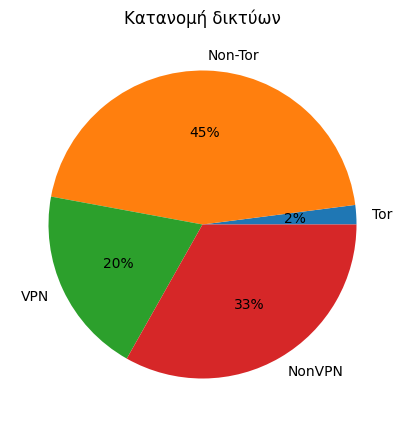

In [9]:
# γραφική απεικόνιση δεδομένων με βάση το εάν είναι Tor - Non-Tor - VPN - NonVPN
type_classify=['Tor', 'Non-Tor', 'VPN', 'NonVPN']
count_classify=[1392, 30884, 13517, 22738]
fig, ax = plt.subplots(figsize=(7, 5))
ax.pie(count_classify, labels=type_classify, autopct='%0.f%%')
ax.set_title('Κατανομή δικτύων')
plt.show()

## **Προεπεξεργασία Δεδομένων και Διερευνητική Ανάλυση Δεδομένων**
Καθαρισμός δεδομένων εφαρμόζοντας τεχνικές προεπεξεργασίας και μετατροπή τους σε κατάλληλη μορφοποίηση ώστε να χρησιμοποιηθούν από τα μοντέλα ΜΜ.

In [10]:
# επιλογή ανεξάρτητων μεταβλητών
features = ['Protocol', 'Flow_Duration',
       'Total_Fwd_Packet', 'Total_Bwd_packets', 'Total_Length_of_Fwd_Packet',
       'Total_Length_of_Bwd_Packet', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Packet_Length_Min', 'Packet_Length_Max', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',
       'URG_Flag_Count', 'CWE_Flag_Count', 'ECE_Flag_Count', 'Down/Up_Ratio',
       'Average_Packet_Size', 'Fwd_Segment_Size_Avg', 'Bwd_Segment_Size_Avg',
       'Fwd_Bytes/Bulk_Avg', 'Fwd_Packet/Bulk_Avg', 'Fwd_Bulk_Rate_Avg',
       'Bwd_Bytes/Bulk_Avg', 'Bwd_Packet/Bulk_Avg', 'Bwd_Bulk_Rate_Avg',
       'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes', 'Subflow_Bwd_Packets',
       'Subflow_Bwd_Bytes', 'FWD_Init_Win_Bytes', 'Bwd_Init_Win_Bytes',
       'Fwd_Act_Data_Pkts', 'Fwd_Seg_Size_Min', 'Active_Mean', 'Active_Std',
       'Active_Max', 'Active_Min', 'Idle_Mean', 'Idle_Std', 'Idle_Max',
       'Idle_Min']


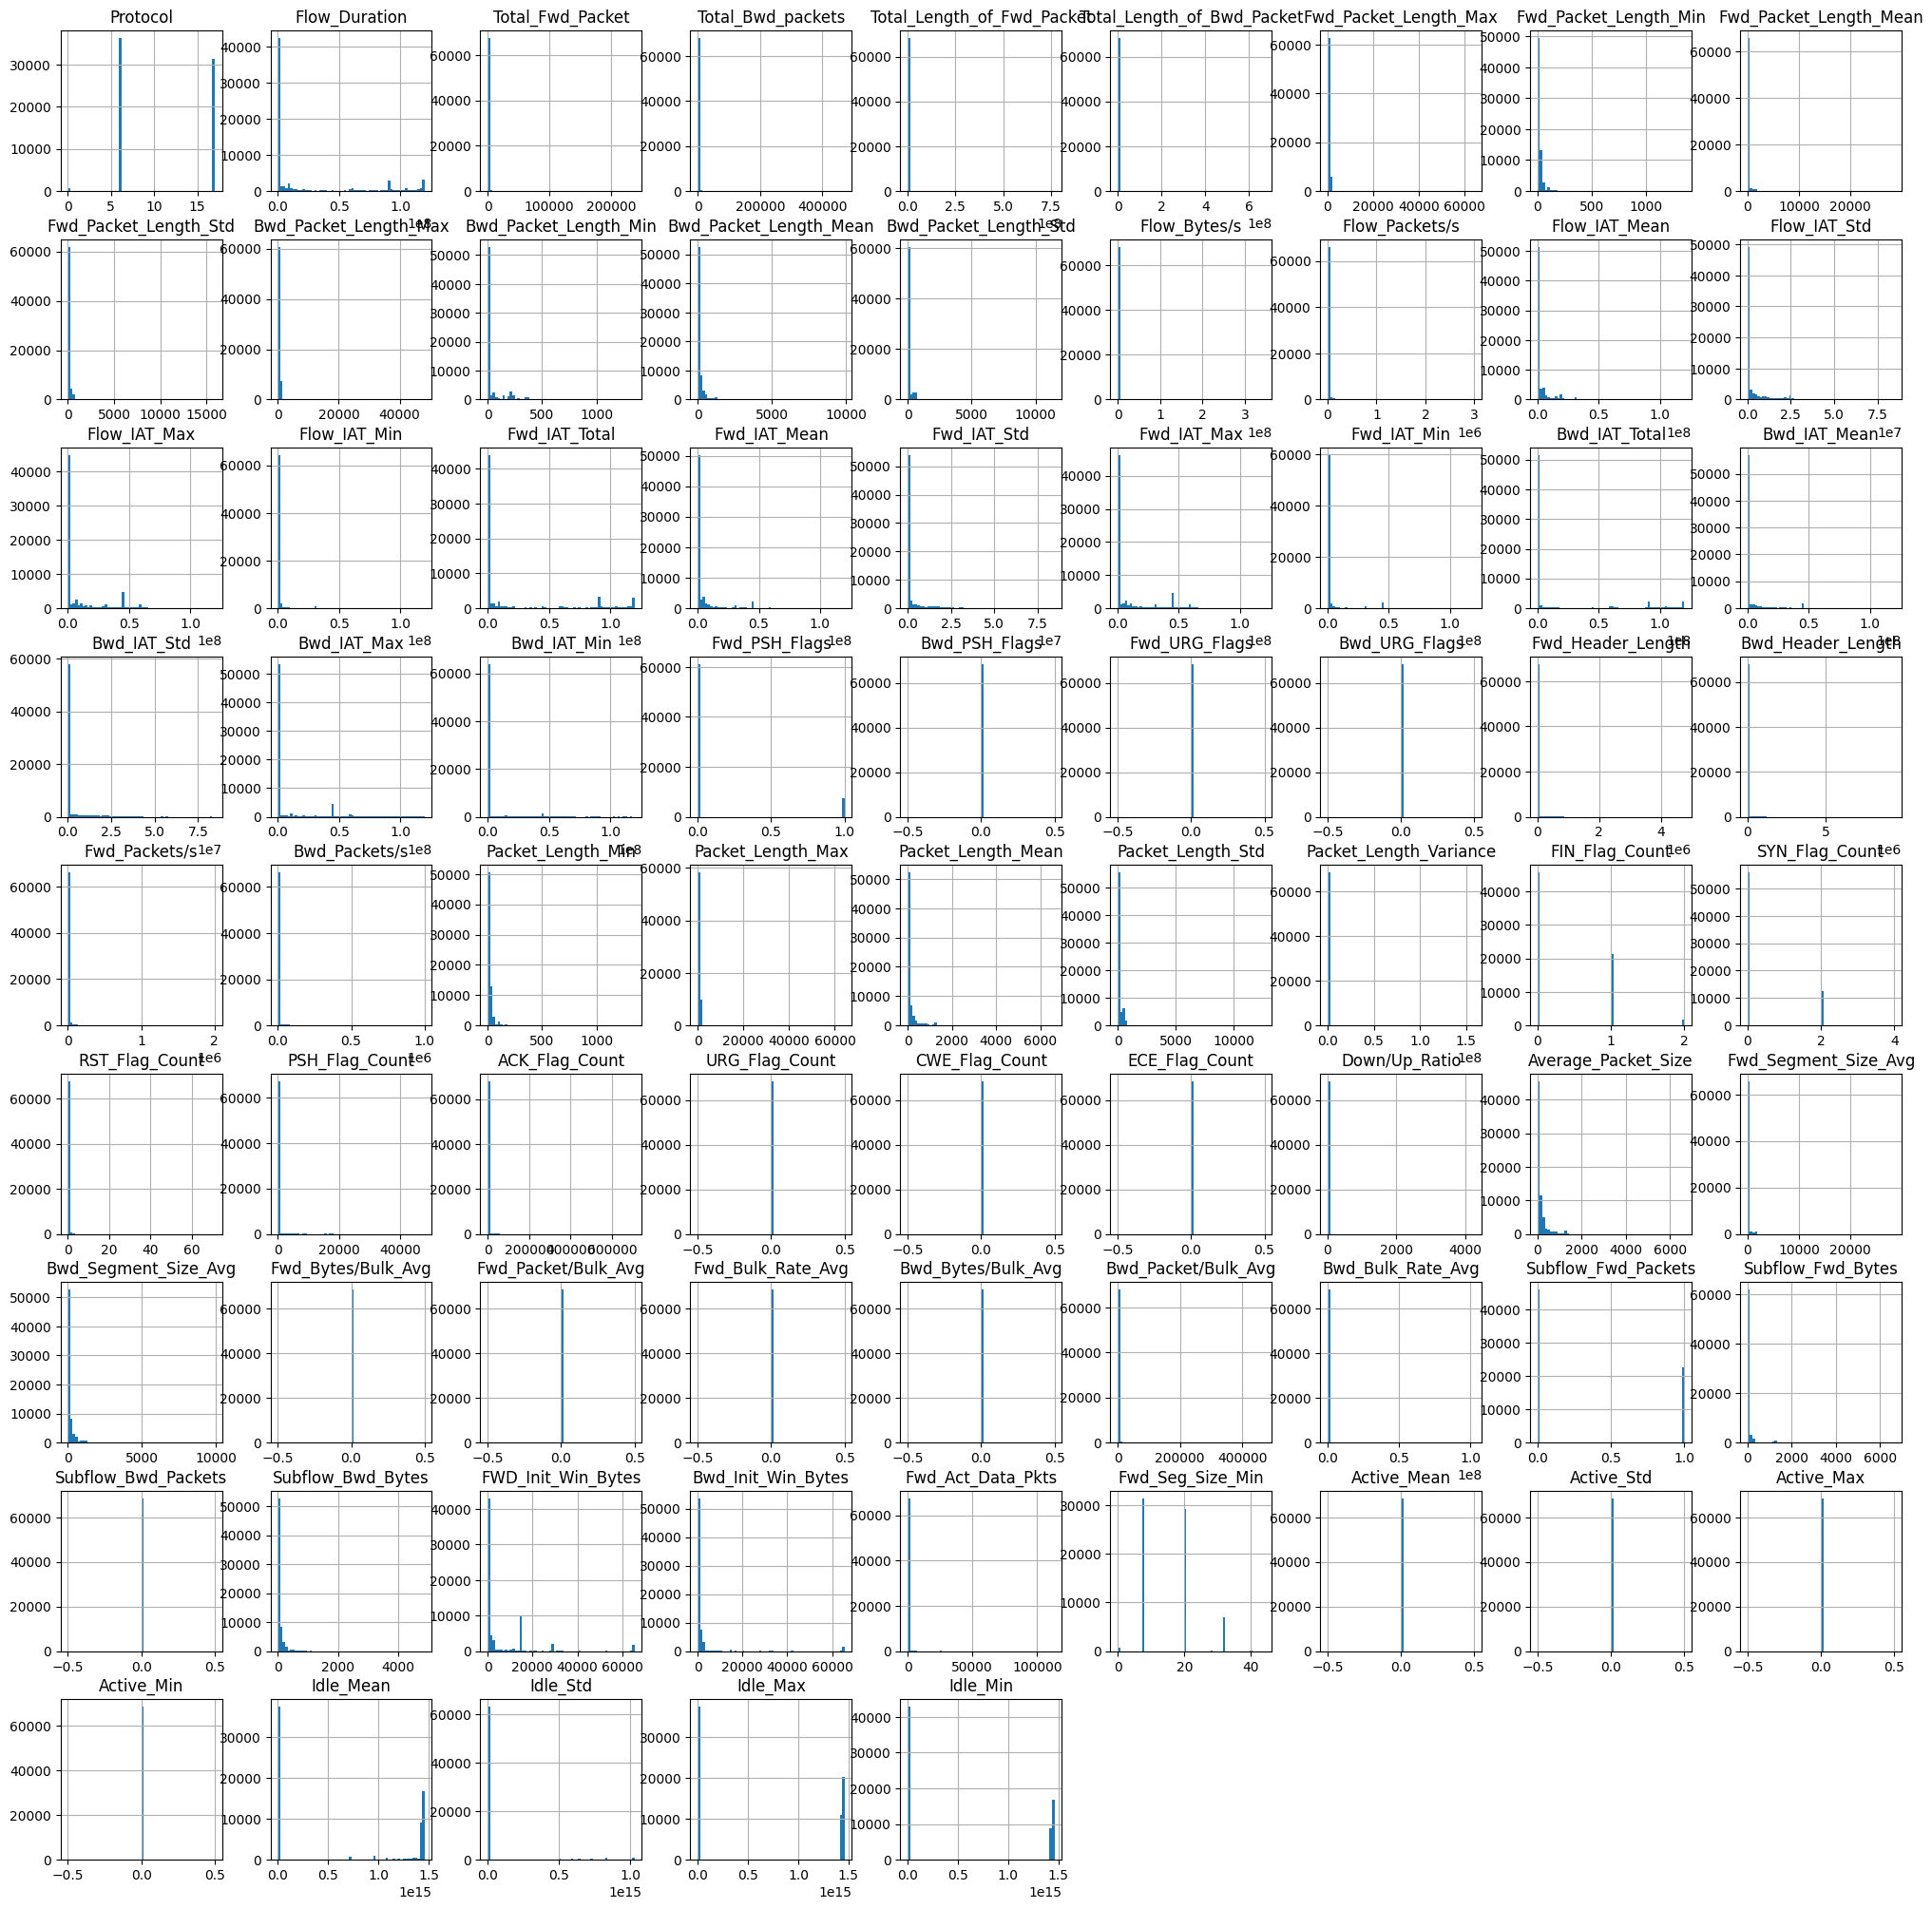

In [11]:
# οπτικοποίηση της κατανομής των δεδομένων
dataset[features].hist(bins = 60,figsize = (25,25))
plt.show()

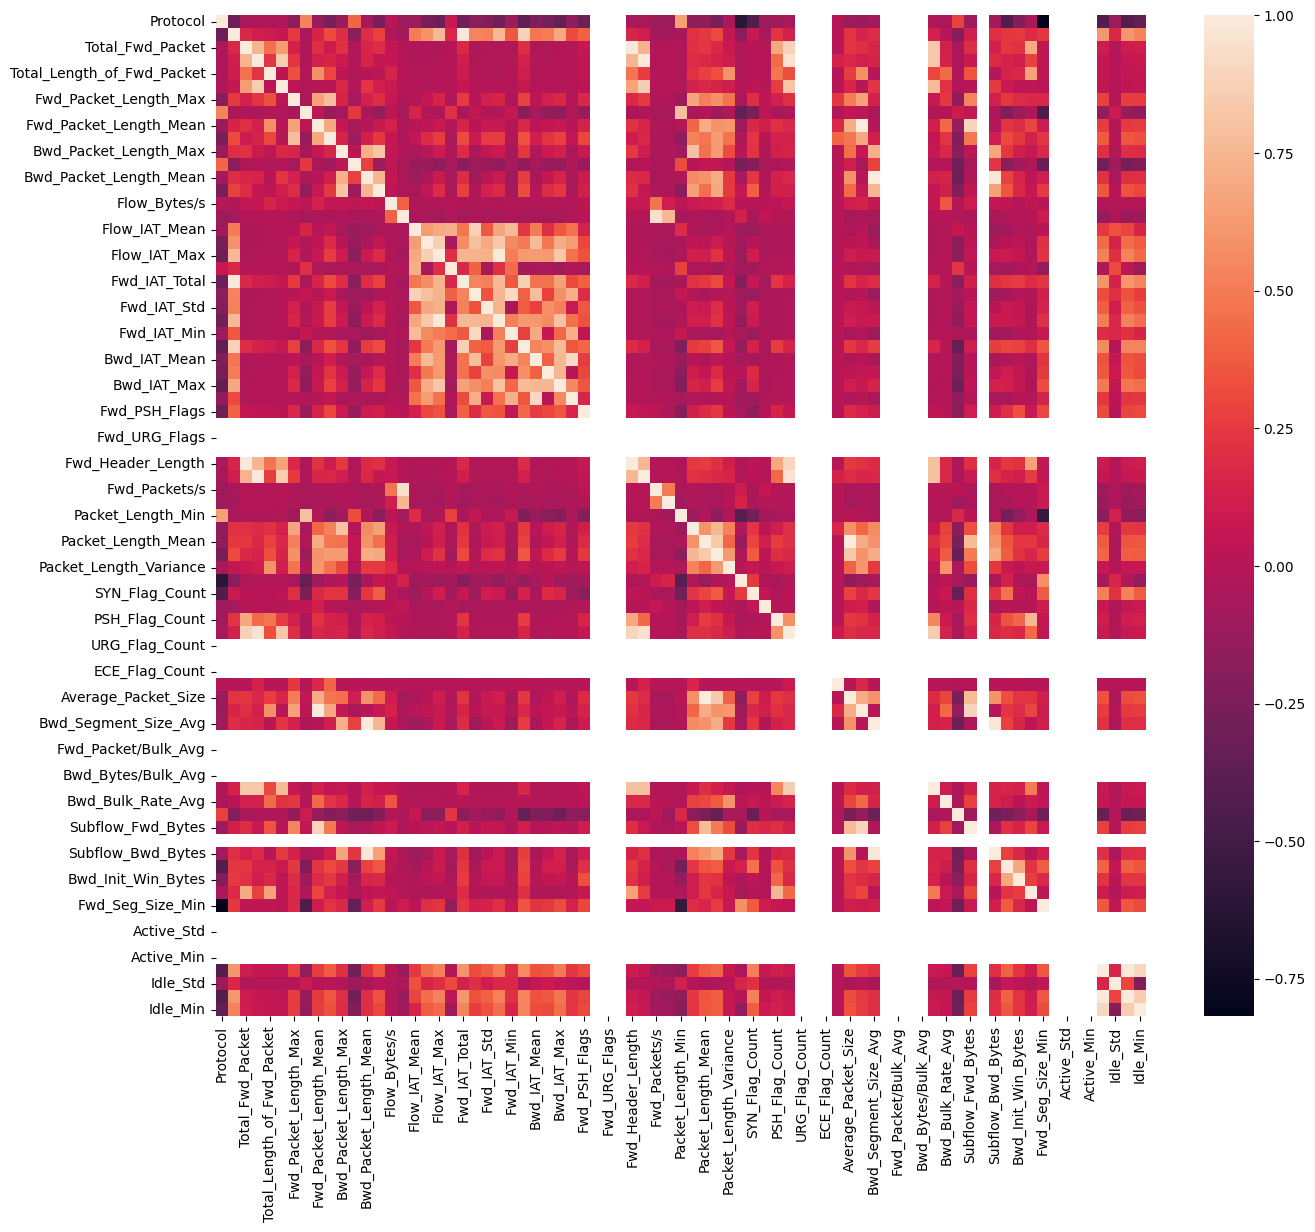

In [12]:
# πίνακας συσχέτισης χαρακτηριστικών του συνόλου δεδομένων
plt.figure(figsize=(15,13))
sns.heatmap(dataset[features].corr())
plt.show()

## **Τμηματοποίηση Δεδομένων**

In [13]:
# αντιστίχοιση κατηγοριών κίνησης με αριθμητικές τιμές
network_categories = {'Tor': 0, 'Non-Tor': 1, 'VPN': 2, 'NonVPN': 3}
dataset['Label-1'] = dataset['Label-1'].map(network_categories)

In [14]:
# διαχωρισμός και εκχώρηση ανεξάρτητων μεταβλητών σε X και μεταβλητών στόχων σε y
# one hot κωδικοποίηση των εφαρμογών της τελευταίας στήλης 'Label-2'
X=dataset[features].join(pd.get_dummies(dataset['Label-2']))
y = dataset['Label-1']
X.shape, y.shape

((68531, 88), (68531,))

In [15]:
# διαχωρισμός των δεδομένων σε σύνολα εκπαίδευσης (train) και δοκιμών (test)
# κρατάμε το 80% των δεδομένων για εκπαίδευση (train) του μοντέλου και 20% των δεδομένων για δοκιμές επιβεβαίωσης της ακρίβειας του μοντέλου 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((54824, 88), (13707, 88))

## **Μοντέλα ΜΜ και Διαδικασία Εκπαίδευσης**

Από το παραπάνω σύνολο δεδομένων, είναι σαφές ότι πρόκειται για μια εποπτευόμενη εργασία ΜΜ (supervised learning). Συγεκριμένα, το πρόβλημα το οποίο εξετάζεται, αντιμετωπίζεται ως πρόβλημα ταξινόμησης (classification), καθώς η κάθε περίπτωση (είδος κίνησης δικτύου εισόδου) ταξινομείται ως Non-Tor (1), 
ως Tor (0), ως VPN (2), ή ως NonVPN (3).
Στην περίπτωση χρήσης που εξετάζεται, χρησιμοποιούνται οι παρακάτω αλγόριθμοι ταξινόμησης ως εποπτευόμενα μοντέλα ΜΜ:

* Decision Tree
* Random Forest


### **Decision Tree**
 Decision Tree (δέντρο αποφάσεων). Είναι ένας μη παραμετρικός εποπτευόμενος αλγόριθμος μάθησης, ο οποίος έχει μια ιεραρχική, δεντρική δομή, η οποία αποτελείται από έναν κόμβο ρίζας, κλάδους, εσωτερικούς κόμβους και κόμβους φύλλων. Ο αλγόριθμος αναζητά όλες τις πιθανές δοκιμές και βρίσκει αυτό που είναι πιο κατατοπιστικό για τη μεταβλητή στόχο.

In [16]:
# δημιουργία αντικειμένου ταξινομητή (μοντέλου) τύπου Decision Tree
tree = DecisionTreeClassifier(max_depth = 14)

# εκπαίδευση του μοντέλου Decision Tree με το 80% του συνόλου των δεδομένων εκπαίδευσης (X_train)
tree.fit(X_train,y_train)

# πρόβλεψη της απόκρισης του μοντέλου με το υπόλοιπο 20% του συνόλου των δεδομένων δοκιμών (X_test)
y_pred_test = tree.predict(X_test)

# η αρκίβεια του μοντέλου μετά την εκπαίδευση
decision_tree_accuracy = accuracy_score(y_test, y_pred_test)
print("Decision Tree Accuracy:", decision_tree_accuracy)

Decision Tree Accuracy: 0.9812504559714015


### **Random Forest**
Random Forest (τυχαίο δάσος). Είναι ένας ευρέως χρησιμοποιούμενος αλγόριθμος ΜΜ, ο οποίος συνδυάζει την έξοδο πολλαπλών δέντρων αποφάσεων για να φτάσει σε ένα μόνο αποτέλεσμα. Κάθε δέντρο μπορεί να κάνει μια σχετικά καλή δουλειά στην πρόβλεψη, αλλά πιθανότατα θα υπερισχύσει σε κάποιο μέρος των δεδομένων. Εάν χτίσουμε πολλά δέντρα, τα οποία λειτουργούν καλά και προσαρμόζονται με διαφορετικούς τρόπους, μπορούμε να μειώσουμε την ποσότητα της υπερπροσαρμογής (overfitting) υπολογίζοντας τον μέσο όρο των αποτελεσμάτων τους.

In [17]:
# δημιουργία αντικειμένου ταξινομητή (μοντέλου) τύπου Random Forest
forest = RandomForestClassifier(max_depth=14)

# εκπαίδευση του μοντέλου Random Forest με το 80% του συνόλου των δεδομένων εκπαίδευσης (X_train)
forest.fit(X_train,y_train)

# πρόβλεψη της απόκρισης του μοντέλου με το υπόλοιπο 20% του συνόλου των δεδομένων δοκιμών (X_test)
y_pred_test = forest.predict(X_test)

# η αρκίβεια του μοντέλου μετά την εκπαίδευση
random_forest_accuracy = accuracy_score(y_test, y_pred_test)
print("Random Forest Accuracy:", random_forest_accuracy)

# anomalies = X_test[X_test['Label-1'] == 0]
# print("Detected Anomalies:")
# print(anomalies)


Random Forest Accuracy: 0.9830013861530604


## **Σύγκριση Μοντέλων**
Δημιουργία ενός πλαισίου δεδομένων (dataframe) για την σύγκριση της απόδοσης των μοντέλων.

In [18]:
# σύγκριση ακρίβειας μοντέλων
results = pd.DataFrame({ 'ML Model': ['Decicion Tree', 'Random Forest'],
    'Test Accuracy': [decision_tree_accuracy, random_forest_accuracy]})
results

,ML Model,Test Accuracy
0,Decicion Tree,0.981250
1,Random Forest,0.983001


## **Συμπέρασμα**

Το μοντέλο **Random Forest** είναι το πιο αποδοτικό για το συγκεκριμένο σύνολο δεδομένων. Το συγκρκριμένο μοντέλο
μετά την εκπαίδευσή του είναι πλέον σε θέση να αναγνωρίσει με εκπληκτική ακρίβεια το είδος της κίνησης του δικτύου,
δηλαδή εάν αυτή προέρχεται από Tor ή NonTor δίκτυο, όπως επίσης από VPN ή NonVPN.